# Лабораторна робота 8

1. Детально ознайомитись із засобами обробки тестових рядків в мові Python.

In [1]:
import numpy as np
import networkx as nx

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

2. Мовою Python самостійно розробити програмний модуль підрахунку ваги слів.

In [2]:

def word_weights(text):
    words = text.lower().split()
    return Counter(words)

# text = "цей текст містить текст і ще трохи тексту"
text = "Скажи мені, хто твій друг, і я скажу, хто ти"


word_weights(text)

Counter({'хто': 2,
         'скажи': 1,
         'мені,': 1,
         'твій': 1,
         'друг,': 1,
         'і': 1,
         'я': 1,
         'скажу,': 1,
         'ти': 1})

3. Ознайомитись з іншими методами розрахунку ваги слів, зокрема методом TF-IDF, дисперсійним методом і методом горизонтальної видимості (HVG).

In [3]:
texts = [text]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())

tfidf_matrix.toarray()

['друг' 'мені' 'скажи' 'скажу' 'твій' 'ти' 'хто']


array([[0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
        0.31622777, 0.63245553]])

In [4]:

def dispersion_score(word, text):
    words = text.split()
    indices = [i for i, w in enumerate(words) if w == word]
    if len(indices) < 2:
        return 0  # якщо слово з'являється один раз, дисперсія = 0
    return np.var(np.diff(indices))

print(dispersion_score("текст", text))

0


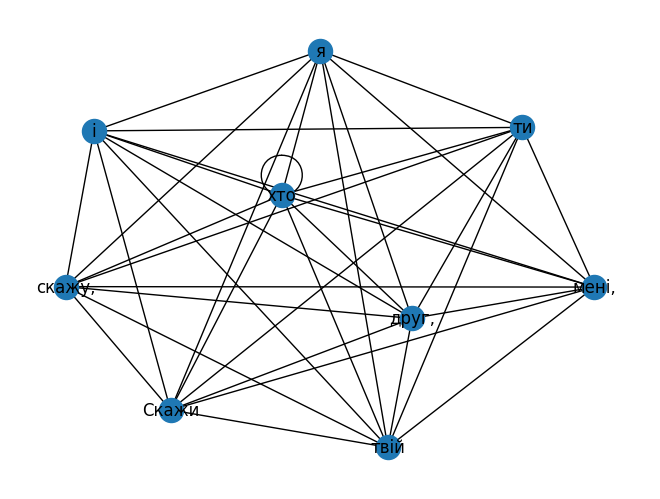

In [5]:
def build_hvg(text):
    words = text.split()
    G = nx.Graph()
    
    for i, word in enumerate(words):
        G.add_node(word)
        for j in range(i + 1, len(words)):
            G.add_edge(word, words[j])
    
    return G

G = build_hvg(text)
nx.draw(G, with_labels=True)

4. Сформувати матрицю суміжності термінологічної мережі.

In [6]:
def adjacency_matrix(graph):
    return nx.adjacency_matrix(graph).todense()

adjacency_matrix(G)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]])